## Интеллектуальные системы и технологии  
Практика №4. Алгоритмы балансировки классов  
Жаров Всеволод, ИММО-01-23

In [1]:
import warnings
warnings.filterwarnings("ignore")


from utils.some_def import *

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import classification_report
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree

from imblearn.over_sampling import SMOTE, BorderlineSMOTE

### Загрузка данных

In [2]:
X, y = load_data()

In [3]:
print(len(X))
print(len(y))

351
351


### SMOTE

In [4]:
sm = SMOTE(random_state=42)
X_res_sm, y_res_sm = sm.fit_resample(X, y)

print(len(X_res_sm))
print(len(y_res_sm))

450
450


In [5]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_res_sm, y_res_sm, test_size=0.2, random_state=42)

#### SMV

In [6]:
best_svm = make_svm(x_train_sm, y_train_sm)
print(best_svm.kernel)
print(best_svm.C)
print(len(best_svm.support_vectors_))
svm_preds = best_svm.predict(x_test_sm)

0.9472222222222222
{'C': 6, 'kernel': 'rbf'}
rbf
6
92


              precision    recall  f1-score   support

           b       1.00      0.94      0.97        48
           g       0.93      1.00      0.97        42

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



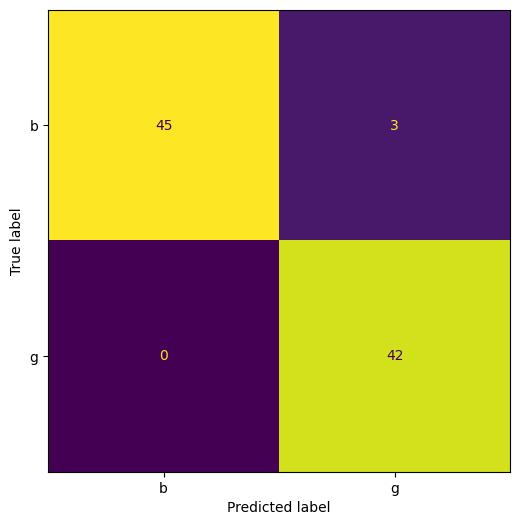

In [7]:
compare_quality(svm_preds, np.array(y_test_sm))

#### Knn

In [8]:
best_knn = make_knn(x_train_sm, y_train_sm)
knn_preds = best_knn.predict(x_test_sm)

0.9305555555555556
{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}


              precision    recall  f1-score   support

           b       1.00      0.96      0.98        48
           g       0.95      1.00      0.98        42

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



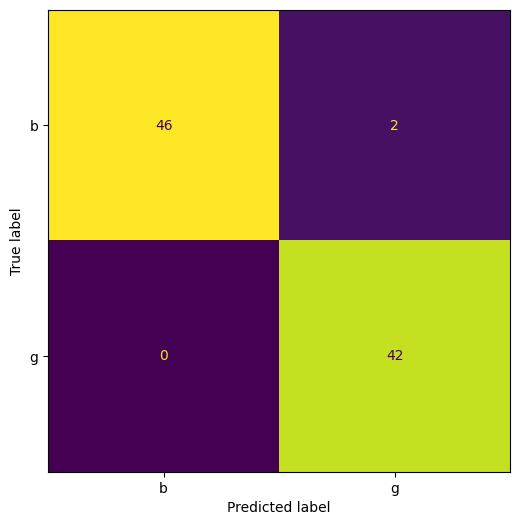

In [9]:
compare_quality(knn_preds, np.array(y_test_sm))

#### Random Forest

In [10]:
best_rf = make_rf(x_train_sm, y_train_sm)
rf_preds = best_rf.predict(x_test_sm)

0.9277777777777778
{'criterion': 'log_loss', 'max_depth': 11, 'min_samples_split': 3, 'n_estimators': 50}


              precision    recall  f1-score   support

           b       1.00      0.88      0.93        48
           g       0.88      1.00      0.93        42

    accuracy                           0.93        90
   macro avg       0.94      0.94      0.93        90
weighted avg       0.94      0.93      0.93        90



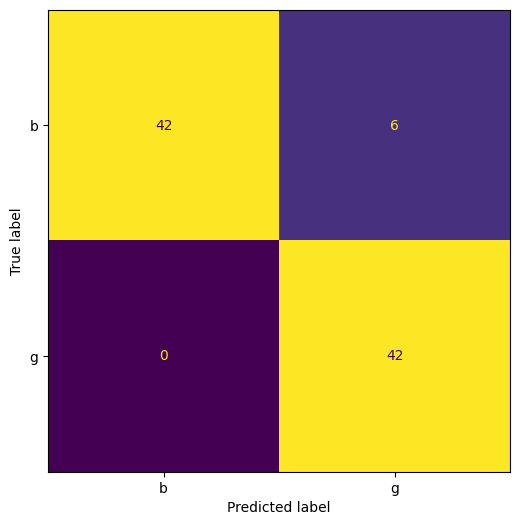

In [11]:
compare_quality(rf_preds, np.array(y_test_sm))

#### UMAP и TSNE

Построим график для knn, т.к. в данном случае он дал лучшие результаты

##### TSNE

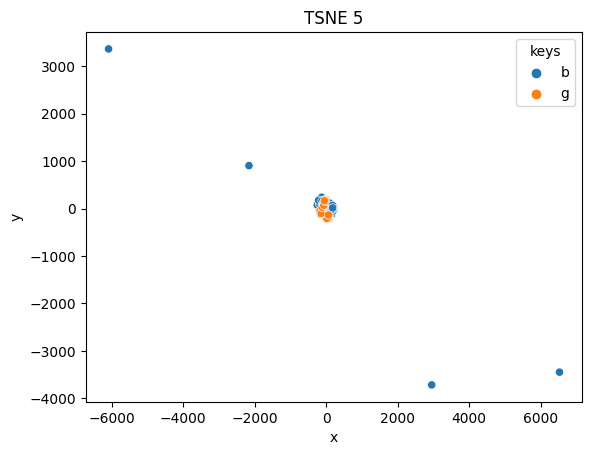

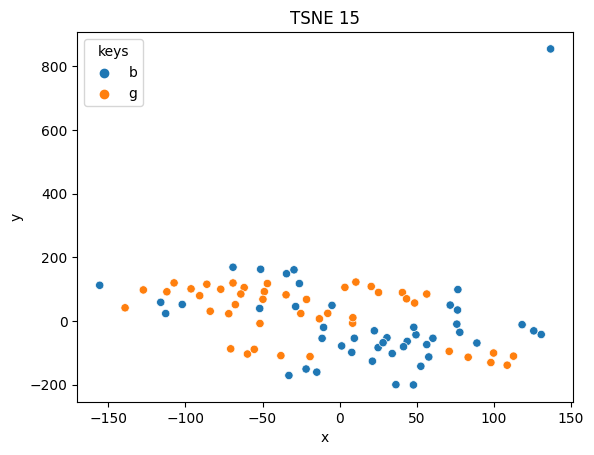

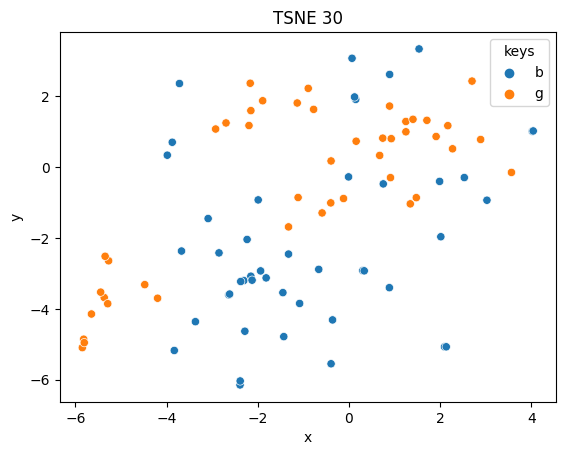

In [12]:
tsne_minmax_plots = make_tsne(x_test_sm, knn_preds, perplexities=[5, 15, 30])

##### UMAP

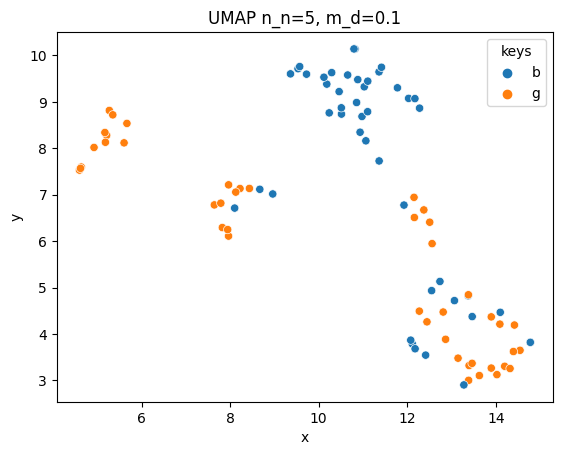

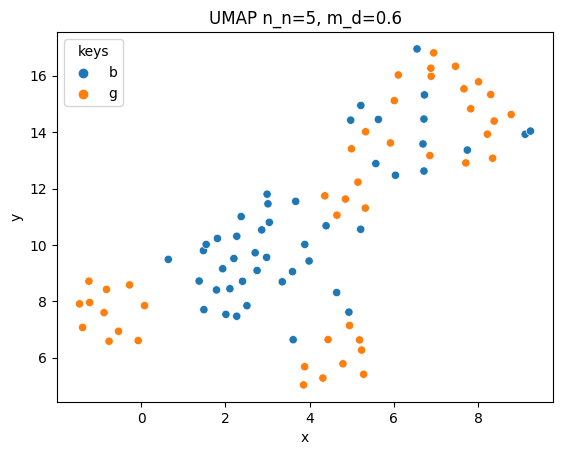

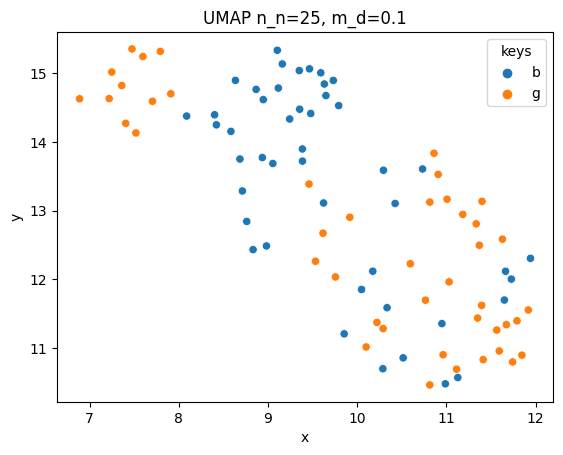

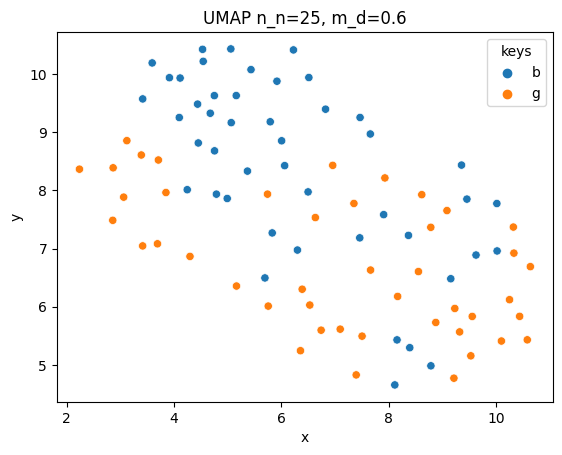

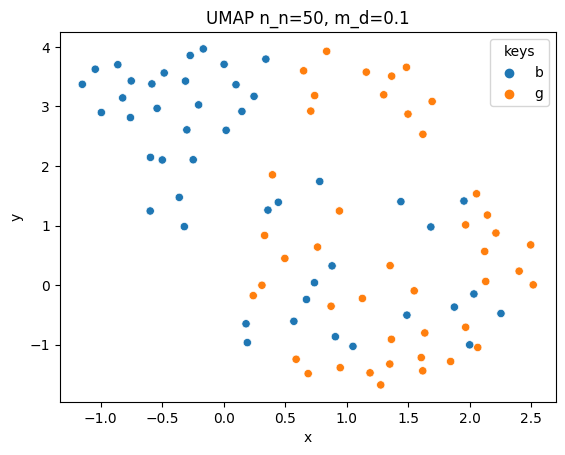

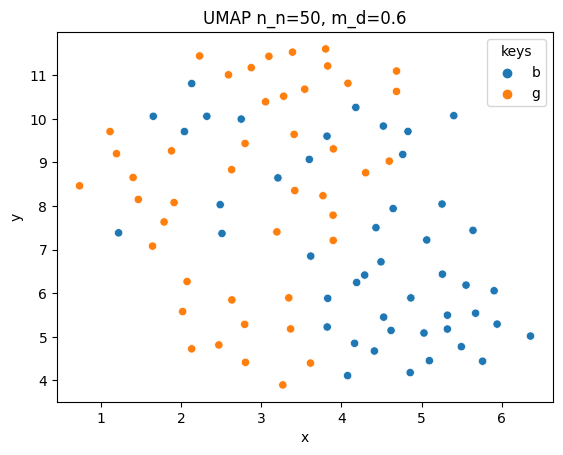

In [14]:
n_n = (5, 25, 50)
m_d = (0.1, 0.6)

um = make_umap(x_test_sm, knn_preds, n_n, m_d)
umap_plots_minmax = plot_umap(um, n_n, m_d)

### Borderline-SMOTE

In [15]:
bsm = BorderlineSMOTE(kind="borderline-1", random_state=42)
X_res_bsm, y_res_bsm = sm.fit_resample(X, y)

print(len(X_res_bsm))
print(len(y_res_bsm))

450
450


In [17]:
x_train_bsm, x_test_bsm, y_train_bsm, y_test_bsm = train_test_split(X_res_bsm, y_res_bsm, test_size=0.2, random_state=42)

#### SMV

In [18]:
best_bsvm = make_svm(x_train_bsm, y_train_bsm)
print(best_bsvm.kernel)
print(best_bsvm.C)
print(len(best_bsvm.support_vectors_))
bsvm_preds = best_bsvm.predict(x_test_bsm)

0.9472222222222222
{'C': 6, 'kernel': 'rbf'}
rbf
6
92


              precision    recall  f1-score   support

           b       1.00      0.94      0.97        48
           g       0.93      1.00      0.97        42

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



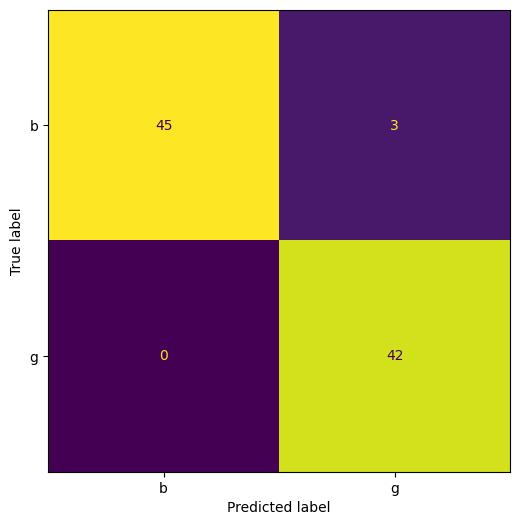

In [19]:
compare_quality(bsvm_preds, np.array(y_test_bsm))

#### Knn

In [20]:
best_knn = make_knn(x_train_bsm, y_train_bsm)
bknn_preds = best_knn.predict(x_test_bsm)

0.9305555555555556
{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}


              precision    recall  f1-score   support

           b       1.00      0.96      0.98        48
           g       0.95      1.00      0.98        42

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



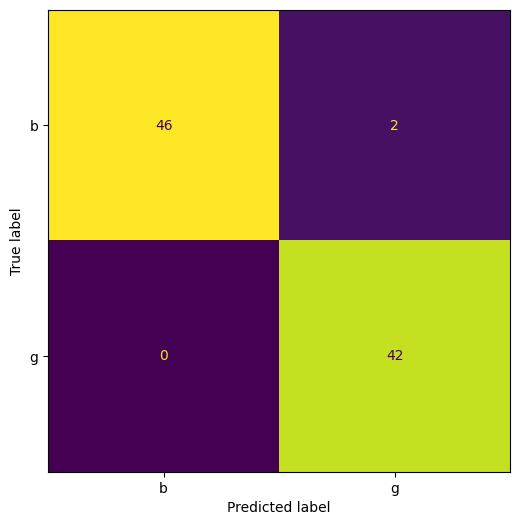

In [21]:
compare_quality(bknn_preds, np.array(y_test_bsm))

#### Random Forest

In [22]:
best_rf = make_rf(x_train_bsm, y_train_bsm)
brf_preds = best_rf.predict(x_test_bsm)

0.9277777777777778
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 3, 'n_estimators': 50}


              precision    recall  f1-score   support

           b       1.00      0.83      0.91        48
           g       0.84      1.00      0.91        42

    accuracy                           0.91        90
   macro avg       0.92      0.92      0.91        90
weighted avg       0.93      0.91      0.91        90



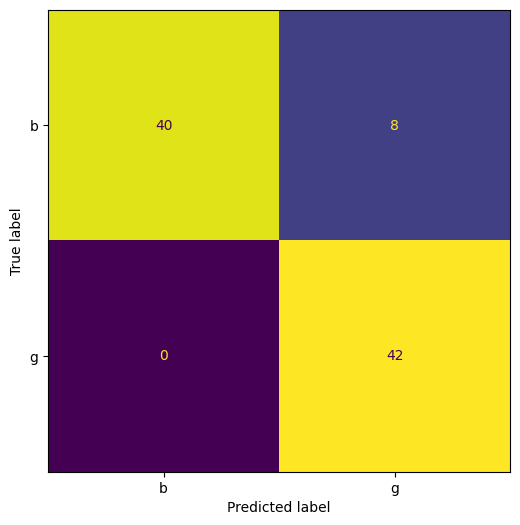

In [23]:
compare_quality(brf_preds, np.array(y_test_bsm))

#### UMAP и TSNE

Построим график для knn, т.к. в данном случае он дал лучшие результаты

##### TSNE

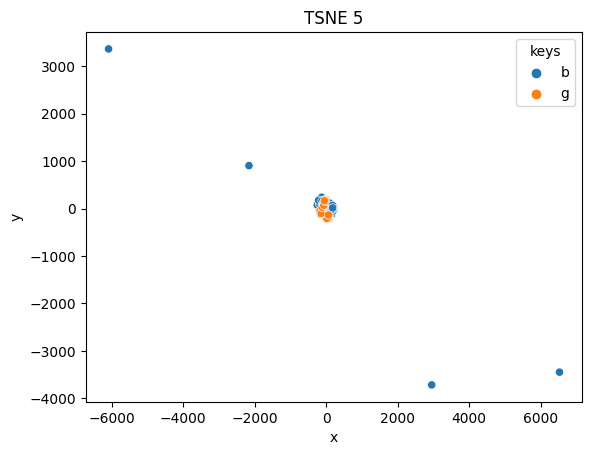

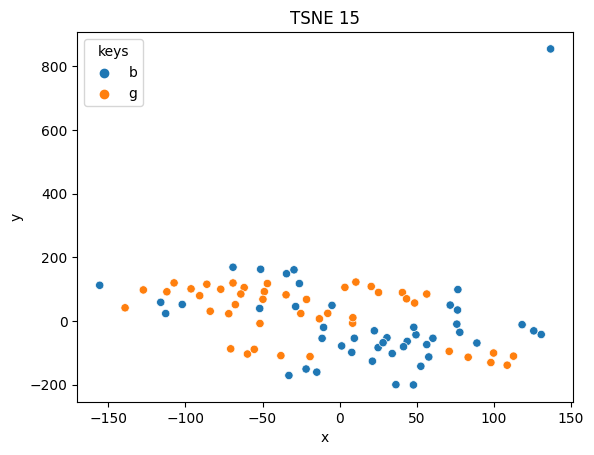

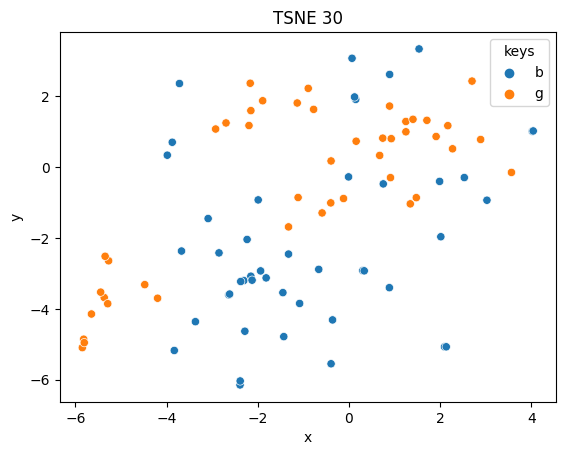

In [24]:
tsne_minmax_plots = make_tsne(x_test_bsm, bknn_preds, perplexities=[5, 15, 30])

##### UMAP

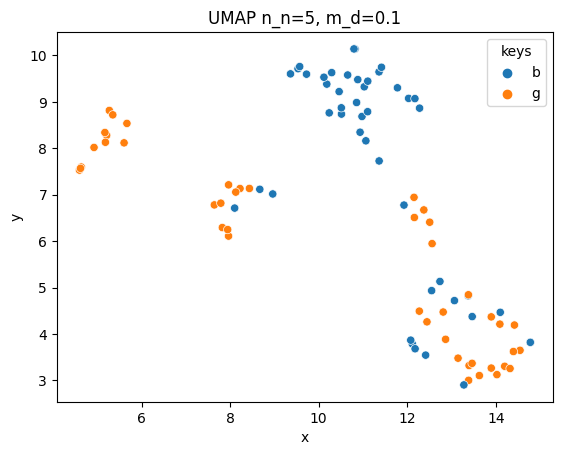

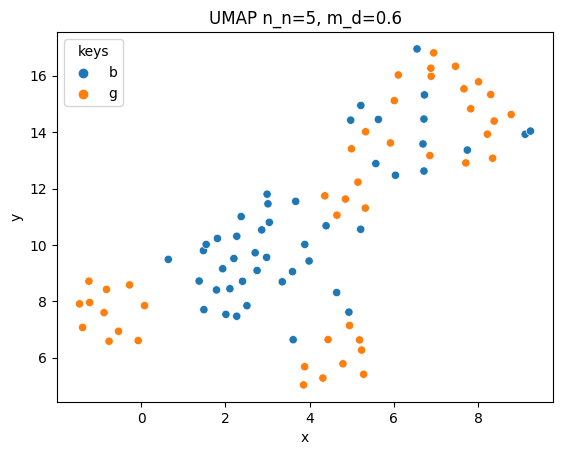

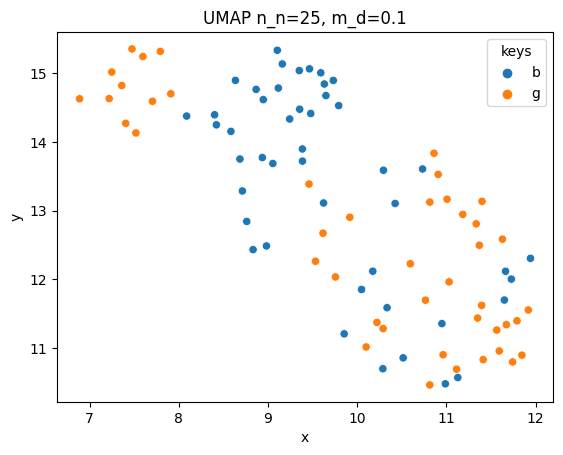

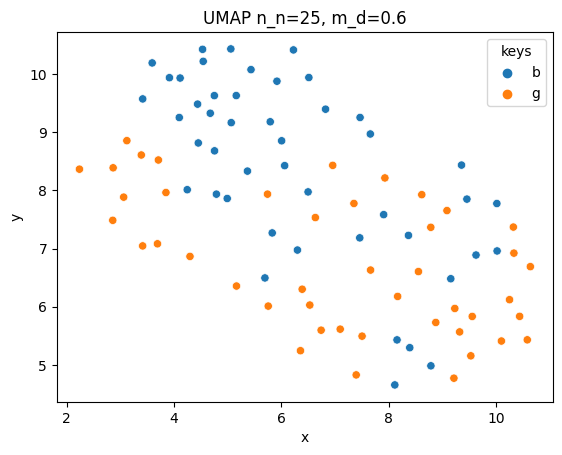

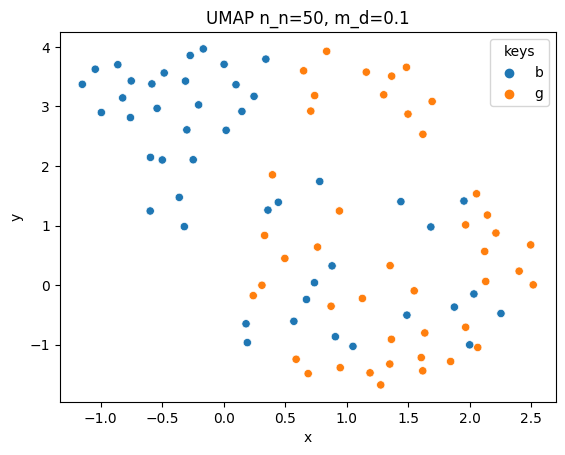

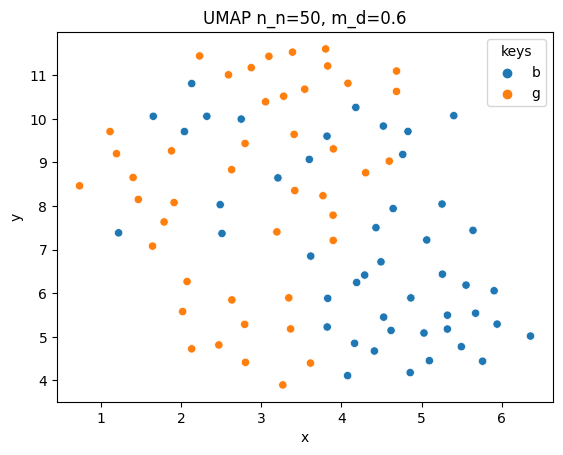

In [25]:
n_n = (5, 25, 50)
m_d = (0.1, 0.6)

um = make_umap(x_test_bsm, bknn_preds, n_n, m_d)
umap_plots_minmax = plot_umap(um, n_n, m_d)

### Borderline-SMOTE-2

In [26]:
b2sm = BorderlineSMOTE(kind="borderline-2", random_state=42)
X_res_b2sm, y_res_b2sm = sm.fit_resample(X, y)

print(len(X_res_b2sm))
print(len(y_res_b2sm))

450
450


In [27]:
x_train_b2sm, x_test_b2sm, y_train_b2sm, y_test_b2sm = train_test_split(X_res_b2sm, y_res_b2sm, test_size=0.2, random_state=42)

#### SMV

In [28]:
best_b2svm = make_svm(x_train_b2sm, y_train_b2sm)
print(best_b2svm.kernel)
print(best_b2svm.C)
print(len(best_b2svm.support_vectors_))
b2svm_preds = best_b2svm.predict(x_test_b2sm)

0.9472222222222222
{'C': 6, 'kernel': 'rbf'}
rbf
6
92


              precision    recall  f1-score   support

           b       1.00      0.94      0.97        48
           g       0.93      1.00      0.97        42

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



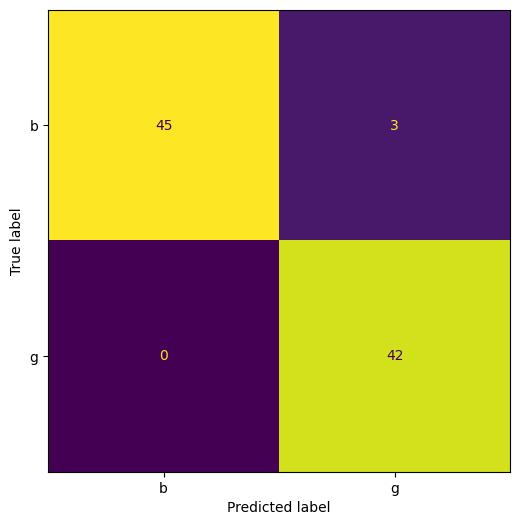

In [30]:
compare_quality(b2svm_preds, np.array(y_test_b2sm))

#### Knn

In [31]:
best_knn = make_knn(x_train_b2sm, y_train_b2sm)
b2knn_preds = best_knn.predict(x_test_b2sm)

0.9305555555555556
{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}


              precision    recall  f1-score   support

           b       1.00      0.96      0.98        48
           g       0.95      1.00      0.98        42

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



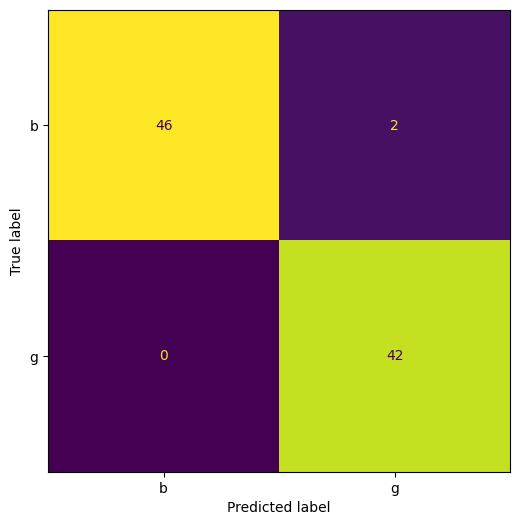

In [32]:
compare_quality(b2knn_preds, np.array(y_test_b2sm))

#### Random Forest

In [33]:
best_rf = make_rf(x_train_b2sm, y_train_b2sm)
b2rf_preds = best_rf.predict(x_test_b2sm)

0.9305555555555556
{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 3, 'n_estimators': 50}


              precision    recall  f1-score   support

           b       1.00      0.85      0.92        48
           g       0.86      1.00      0.92        42

    accuracy                           0.92        90
   macro avg       0.93      0.93      0.92        90
weighted avg       0.93      0.92      0.92        90



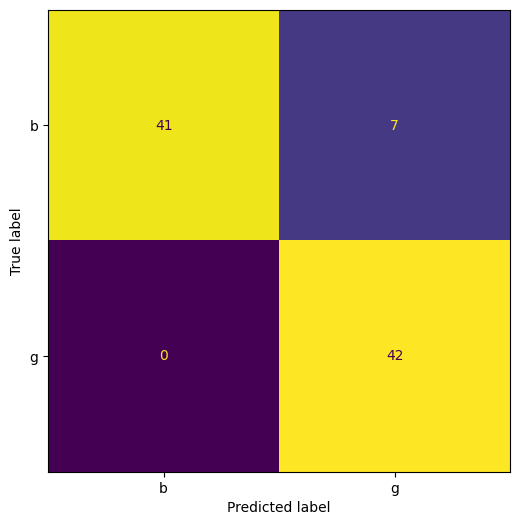

In [34]:
compare_quality(b2rf_preds, np.array(y_test_b2sm))

#### UMAP и TSNE

Построим график для knn, т.к. в данном случае он дал лучшие результаты

##### TSNE

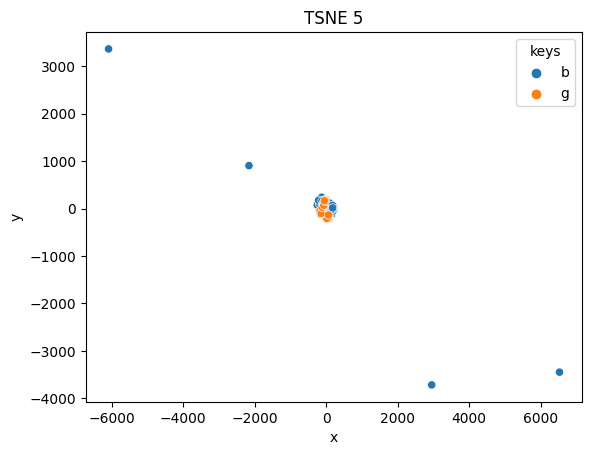

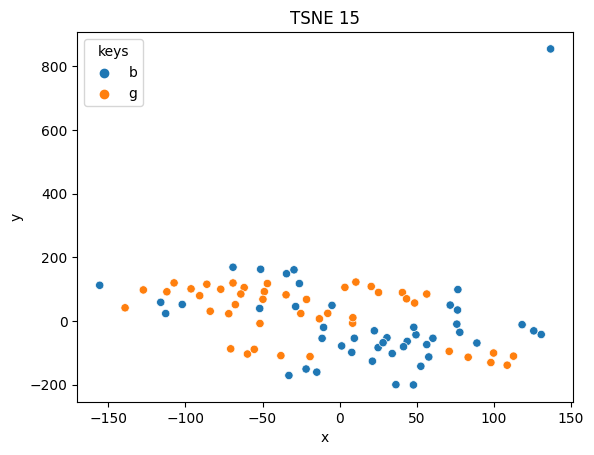

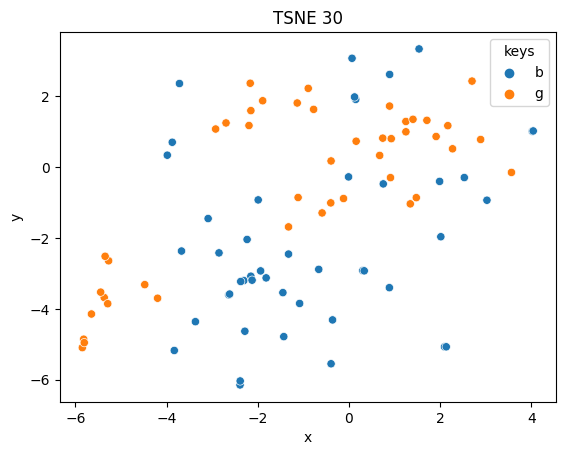

In [35]:
tsne_minmax_plots = make_tsne(x_test_b2sm, b2knn_preds, perplexities=[5, 15, 30])

##### UMAP

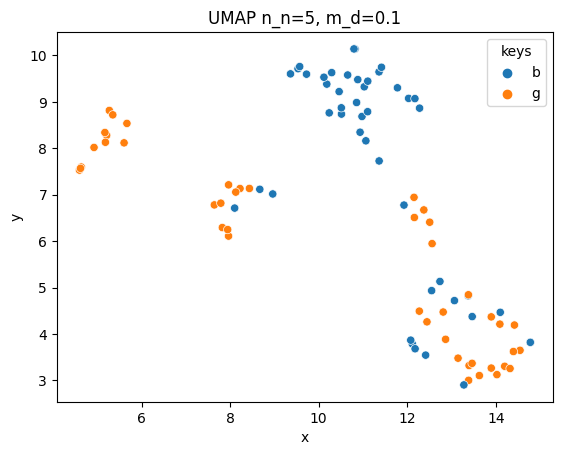

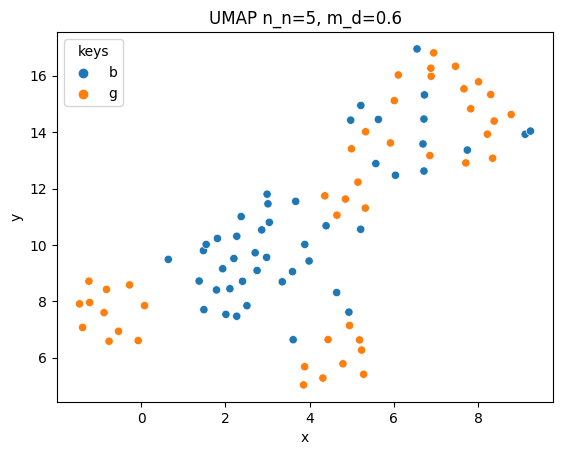

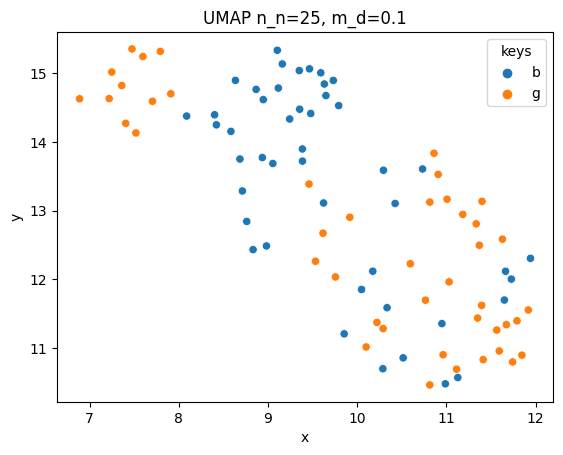

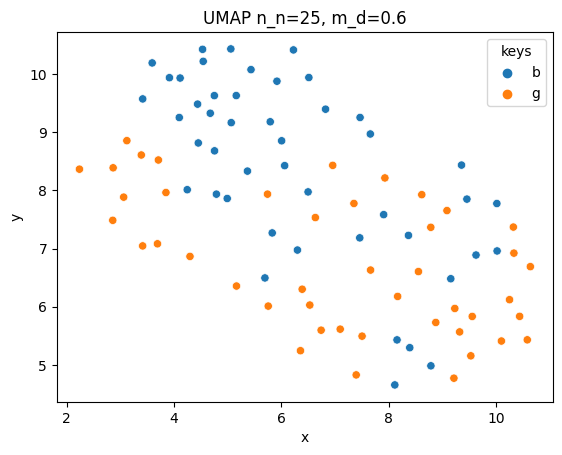

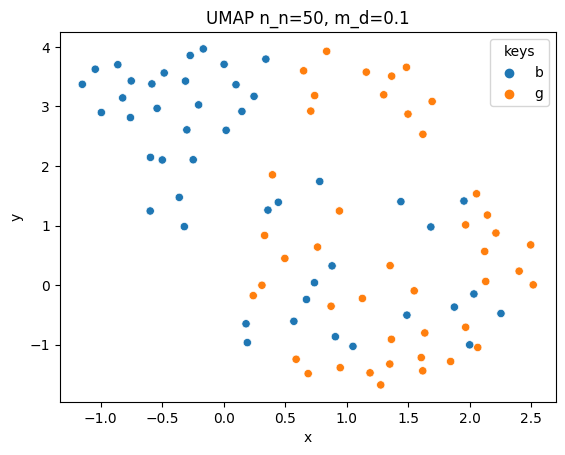

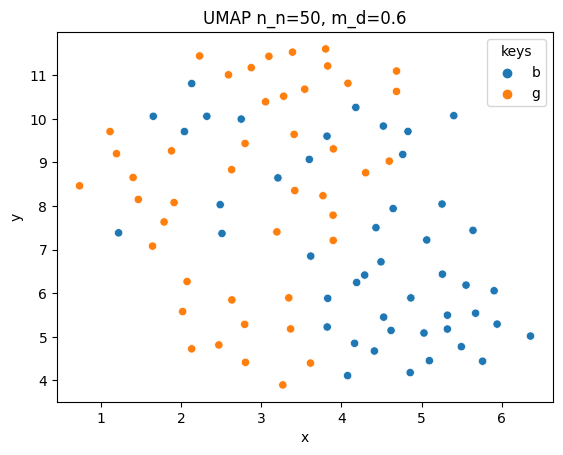

In [36]:
n_n = (5, 25, 50)
m_d = (0.1, 0.6)

um = make_umap(x_test_b2sm, b2knn_preds, n_n, m_d)
umap_plots_minmax = plot_umap(um, n_n, m_d)

### Сводная таблица

Маркировка (ББ) - Без Балансировки  
Маркировка (Б - SM) - с Балансировкой SMOTE  
Маркировка (Б - BSM) - с Балансировкой borderline-SMOTE  
Маркировка (Б - BSM2) - с Балансировкой borderline-SMOTE-2  


| Тип | Точность класса b | Точность класса g | Кол-во ошибок | Тип графика |
|---|---|---|---|---|
| **SVM (ББ)** | 0.90 | 0.95 | 0/5 | 0 (оригинал) |
| **Knn (ББ)** | 0.86 | 0.92 | 0/7 | 0 (оригинал) |
| **RF (ББ)**  | 0.93 | 0.95 | 1/3 | 0 (оригинал) |
| **SVM (Б - SM)** | 0.97 | 0.97 | 0/3 | 1 (отличается) |
| **Knn (Б - SM)** | 0.98 | 0.98 | 0/2 | 1 (отличается) |
| **RF (Б - SM)**  |  0.93 | 0.93 | 0/7 | 1 (отличается) |
| **SVM (Б - BSM)** | 0.97 | 0.97 | 0/3 | 1 (отличается) |
| **Knn (Б - BSM)** | 0.98 | 0.98 | 0/2 | 1 (отличается) |
| **RF (Б - BSM)**  |  0.91 | 0.91 | 0/8 | 1 (отличается) |
| **SVM (Б - BSM2)** | 0.97 | 0.97 | 0/3 | 1 (отличается) |
| **Knn (Б - BSM2)** | 0.98 | 0.98 | 0/2 | 1 (отличается) |
| **RF (Б - BSM2)**  |  0.92 | 0.92 | 0/7 | 1 (отличается) |